In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Tiles

This is a dataset of otter skull morphology.

In [2]:
# uncomment the following:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

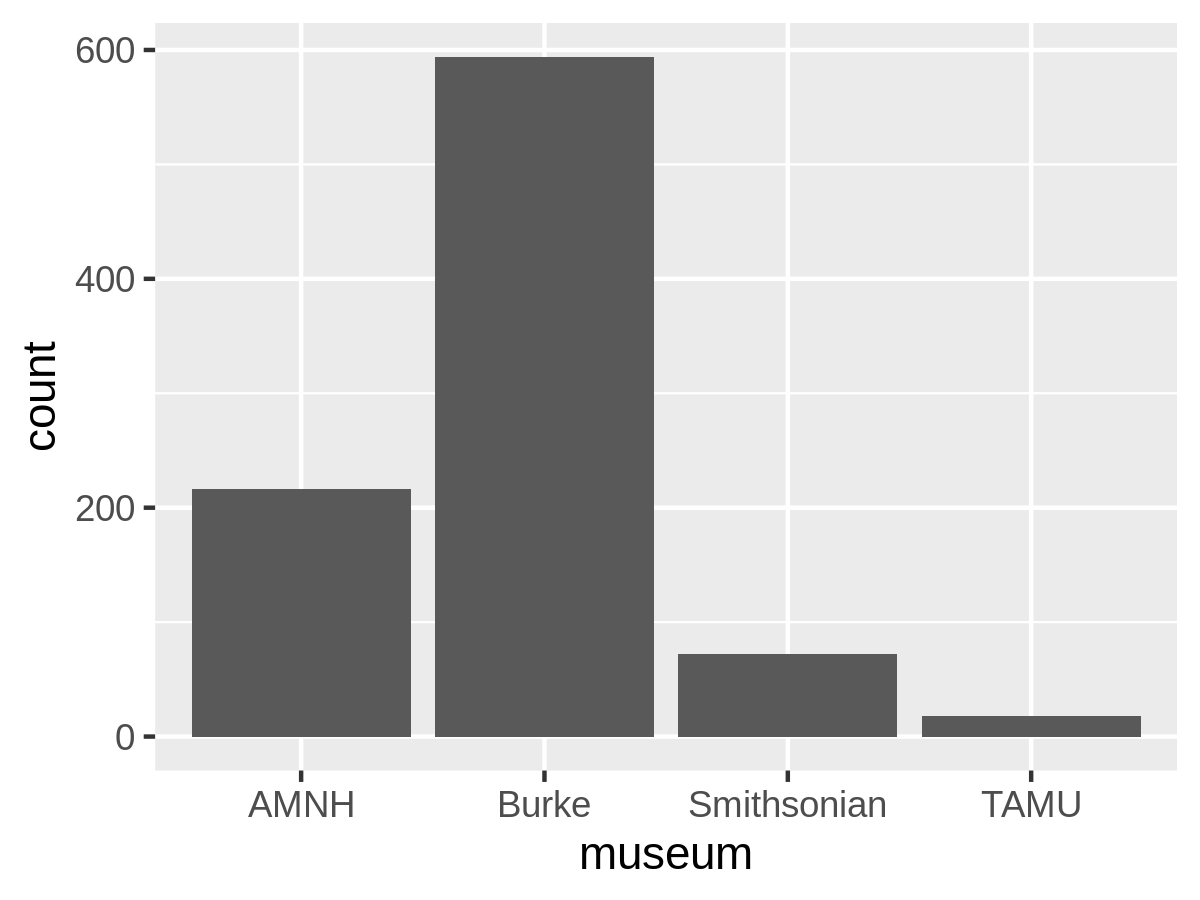

In [3]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

p = ggplot(otter.data, aes(x=museum)) + geom_bar()

p

#Tells us the museums in the graph and the number skulls in each museum

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [4]:
# uncomment this to get a scaled version of the data:

otter.data.scaled = otter.data %>%
group_by(characteristic) %>%
mutate(value.scaled = scales::rescale(value))
otter.data.scaled %>% head

species,museum,accession,characteristic,value,value.scaled
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101458,m1,15.100,0.27867699
A. cinerea,AMNH,101461,m1,12.740,0.11259676
A. cinerea,AMNH,101466,m1,12.425,0.09042928
A. cinerea,AMNH,101635,m1,13.400,0.15904293
A. cinerea,AMNH,101459,m1,14.400,0.22941590
A. cinerea,AMNH,101462,m1,14.525,0.23821253


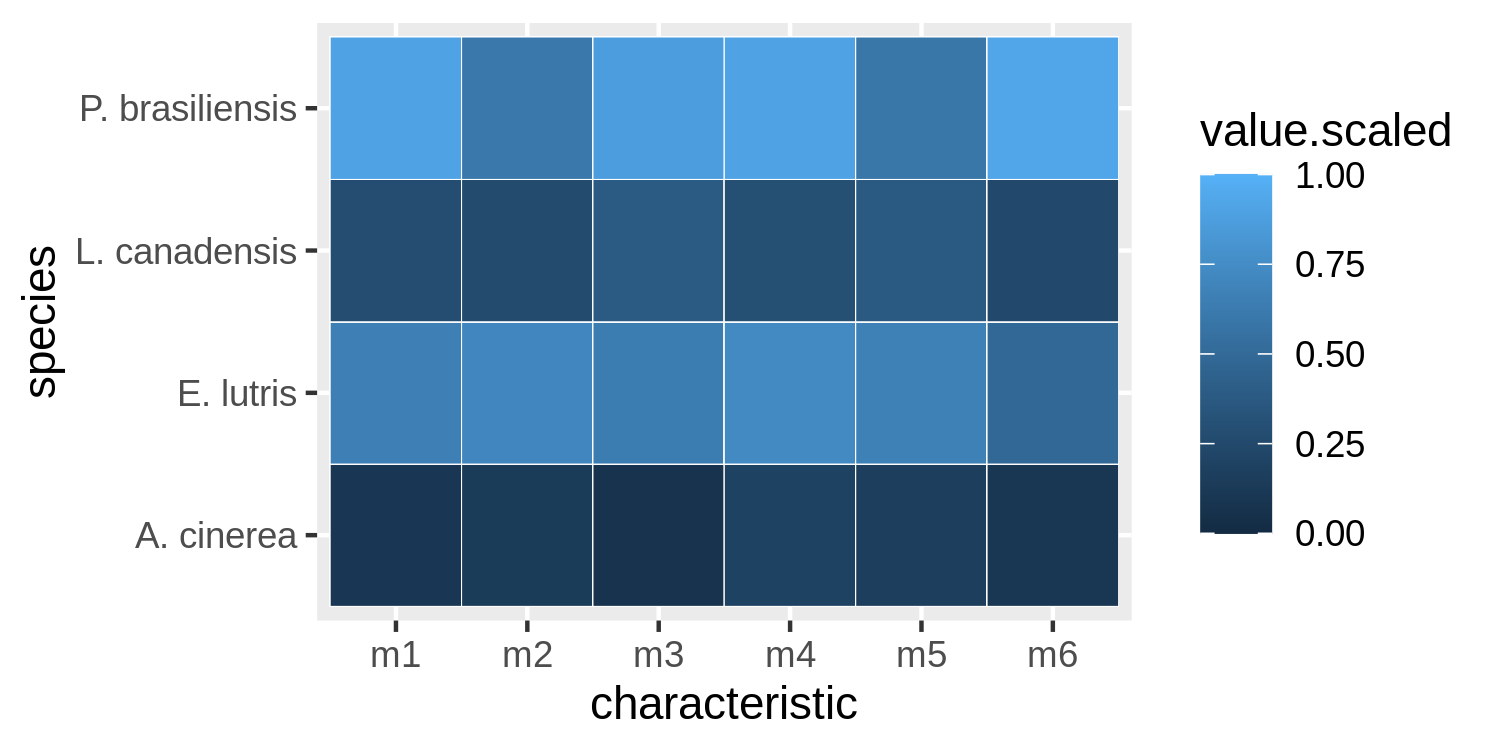

In [6]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data.scaled, aes(x=characteristic , y= species, fill= value.scaled)) + geom_tile(color='white')

p

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

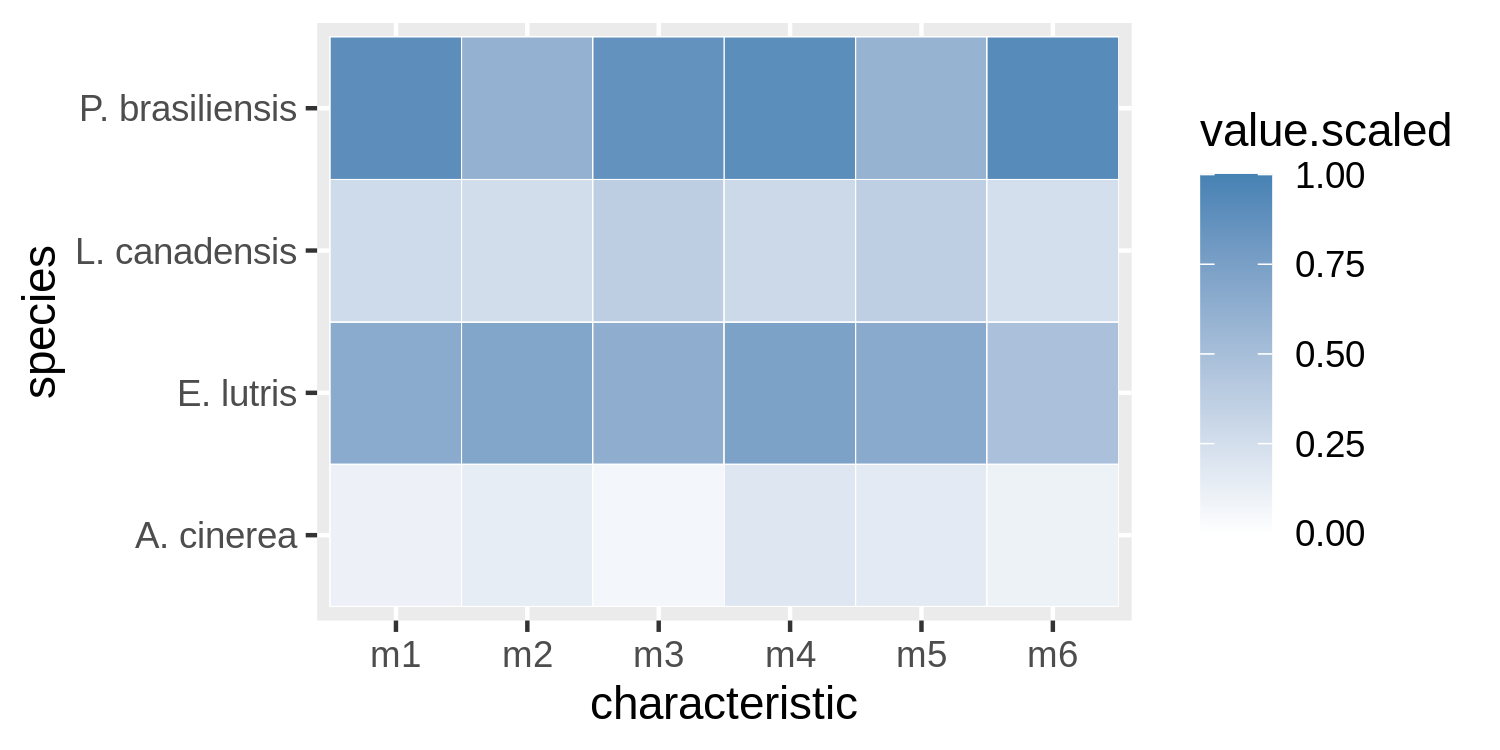

In [7]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data.scaled, aes(x=characteristic , y= species, fill= value.scaled)) + geom_tile(color='white')

p = p + scale_fill_gradient(low = "white", high = "steelblue")
p

# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

Warning message:
“Removed 5 rows containing missing values (geom_point).”


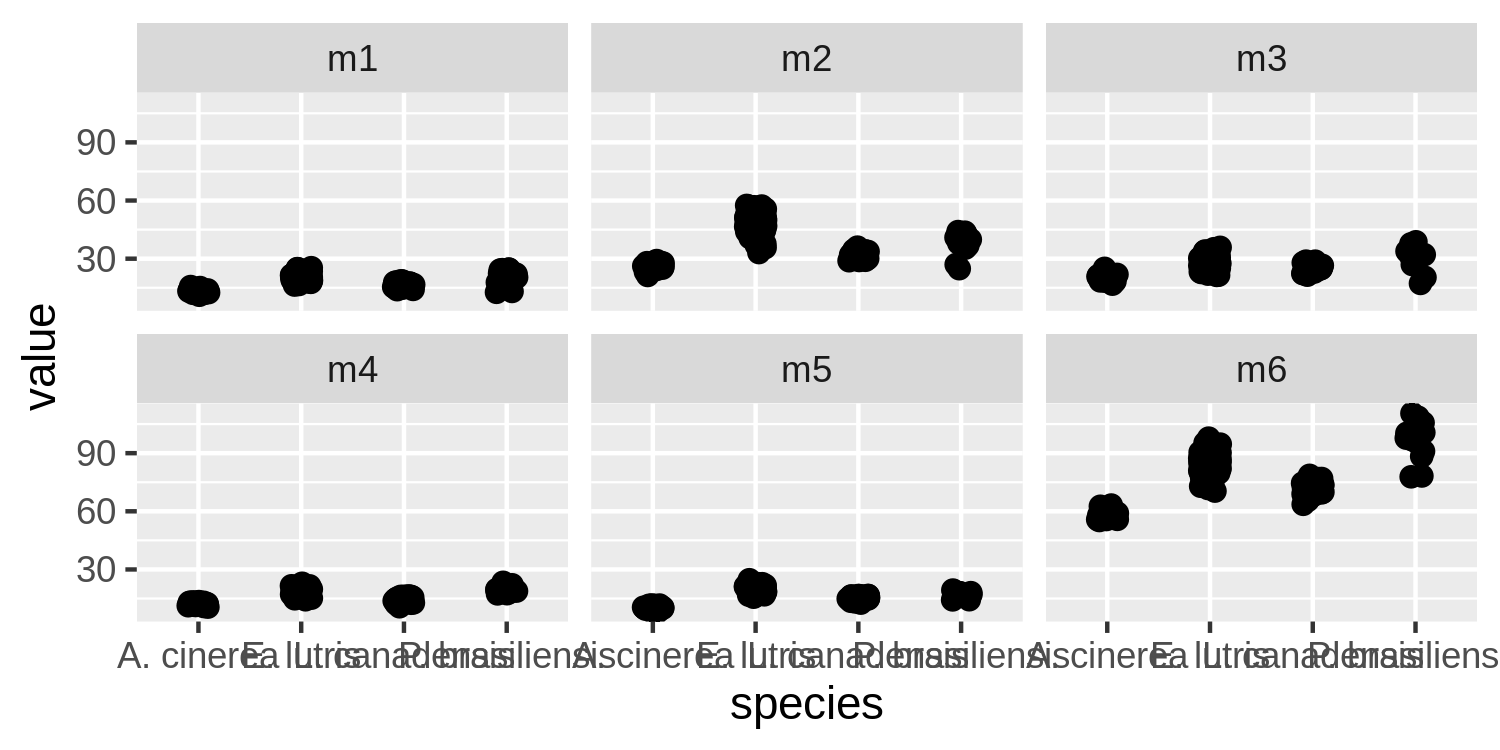

In [8]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data, aes(x = species))

p = p + geom_bar(aes(y = value), stat = 'identity')

p = p + geom_errorbar(aes(ymin = mean_hwy + sd_hwy, ymax = value - value.scaled),
                      color = 'red', width = 0.2)

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

Make the axis test legible by rotating the text 45 degrees.

Warning message:
“Removed 5 rows containing missing values (geom_point).”


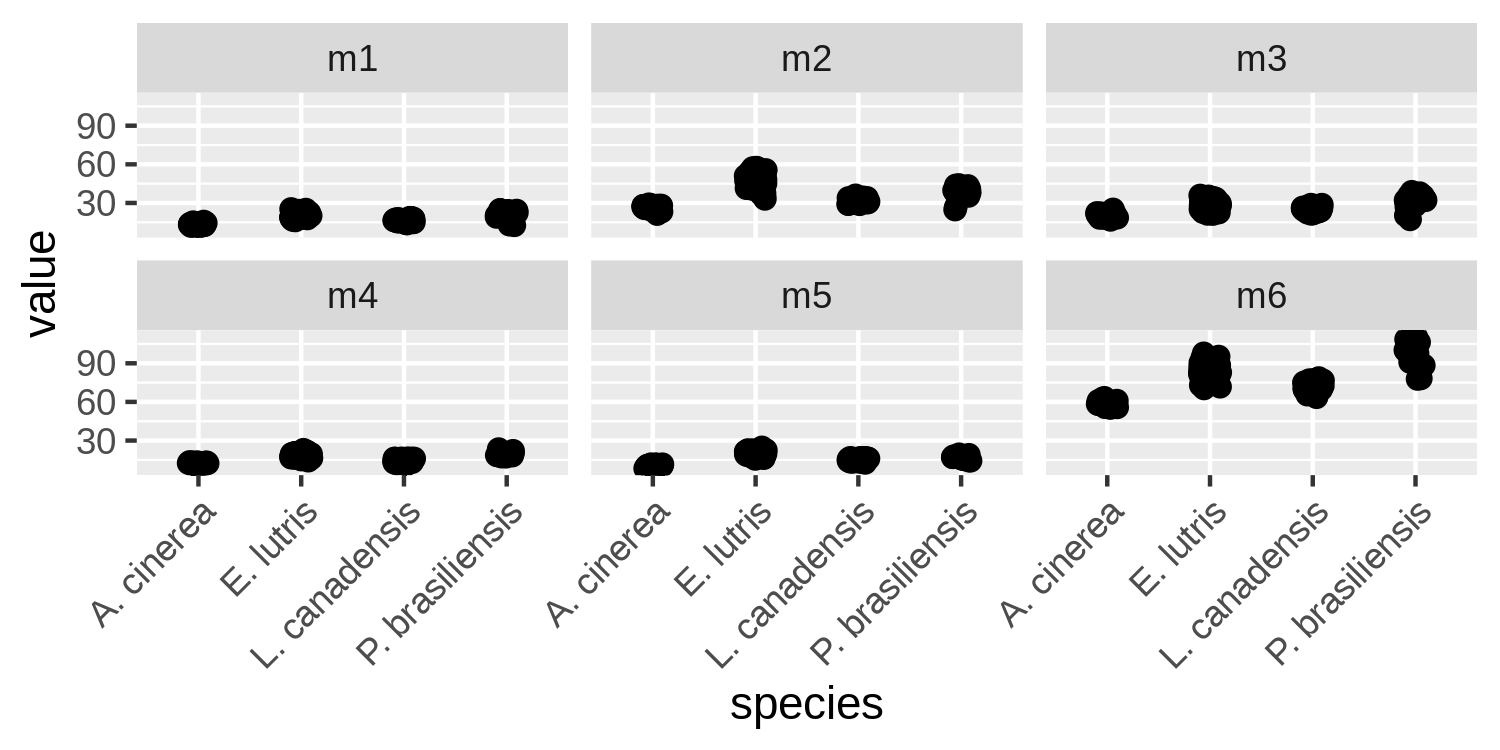

In [10]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

p = ggplot(otter.data.scaled, aes(x=species , y= value)) + geom_point(size=2, position = position_jitter(height=0, width= 0.1))

p = p + facet_wrap(~characteristic) 

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

Do you prefer the heatmap or the point+jitter plot?